# Regressão Linear Simples

***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Importação e limpeza dos dados

In [2]:
df = pd.read_csv('../data/pubchem_compounds.csv')

# Remove registros com valores faltantes
df.dropna(inplace=True, ignore_index=True)

# Remove registros duplicados
df.drop_duplicates(inplace=True, ignore_index=True)

df = df[['mw', 'heavycnt']]

df.shape

(296807, 2)

In [3]:
df.head()

,mw,heavycnt
0,203240,14
1,204240,14
2,75110,5
3,202550,13
4,163180,12


In [4]:
df.tail()

,mw,heavycnt
296802,726000,50
296803,480400,34
296804,211300,15
296805,198260,14
296806,187710,12


In [5]:
# Obter os registros da variável independente
X = np.array(df['heavycnt']).reshape((-1, 1))

# Obter os registros da variável dependente
y = df['mw']

# Ou seja, segundo a nossa lógica, o peso molecular ('mw') dos compostos é influenciado pelo número de átomos pesados ('heavycnt')

## Construção do modelo

In [6]:
lr = LinearRegression()

In [7]:
lr.fit(X,y)

LinearRegression()

### b0

In [8]:
b0 = lr.intercept_

### b1

In [9]:
b1 = lr.coef_

#### Coeficiente de determinação (r²)

In [10]:
r2 = lr.score(X,y)

#### Equação

In [11]:
print(f'Equação -> Y = {round(b0,2)} + {round(b1[0],2)} X')
print(f'r² -> {round(r2,4)}')

Equação -> Y = 1970.44 + 14369.13 X
r² -> 0.9939


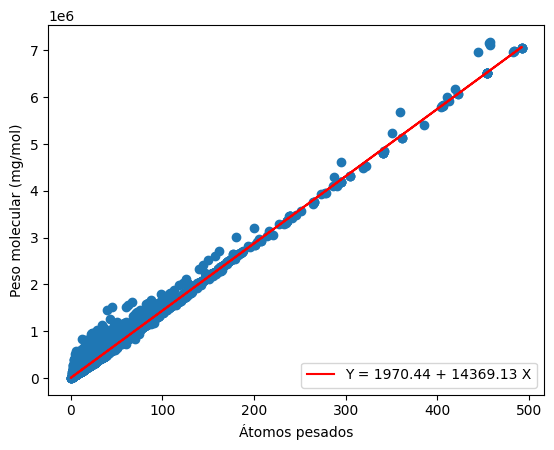

In [12]:
# Primeiro, deve ser feito o plot dos dados observados X vs Y
plt.scatter(df['heavycnt'], df['mw'])

# Segundo, deve ser obtido o valor predito para cada registro X, a partir da equação de regressão
y_pred = lr.predict(X)

# Terceiro, deve ser feito o plot dos dados preditos
plt.plot(df['heavycnt'], y_pred, color='red', label=f'Y = {round(b0,2)} + {round(b1[0],2)} X')

plt.xlabel('Átomos pesados')
plt.ylabel('Peso molecular (mg/mol)')

plt.legend(loc='lower right')
plt.show()

***

## Manipulação dos dados

- É costume expressar peso molecular na unidade g/mol. Para obter esta medida no nosso modelo, precisamos garantir a transformação dos dados antes de treinar a regressão linear:
    - mg/mol -> Y / 1000
 
**Isso impactará no nosso modelo?**

Depende da transformação dos dados. Normalizar ou transformar em logaritmo causará impactos, sim. Mas mudança de unidade como essa, não surtirá efeito, além de melhorar a interpretabilidade dos resultados.

In [13]:
df['mw_g_mol'] = df['mw'] / 1000

In [14]:
df.head()

,mw,heavycnt,mw_g_mol
0,203240,14,203.24
1,204240,14,204.24
2,75110,5,75.11
3,202550,13,202.55
4,163180,12,163.18


In [15]:
X_g_mol = np.array(df['heavycnt']).reshape((-1, 1))
y_g_mol = df['mw_g_mol']
lr_g_mol = LinearRegression()
lr_g_mol.fit(X_g_mol,y_g_mol)
b0_g_mol = lr_g_mol.intercept_
b1_g_mol = lr_g_mol.coef_
r2_g_mol = lr_g_mol.score(X_g_mol,y_g_mol)
print(f'Equação -> Y = {round(b0_g_mol,2)} + {round(b1_g_mol[0],2)} X')
print(f'r² -> {round(r2_g_mol,4)}')

Equação -> Y = 1.97 + 14.37 X
r² -> 0.9939


***

## Visualização do modelo

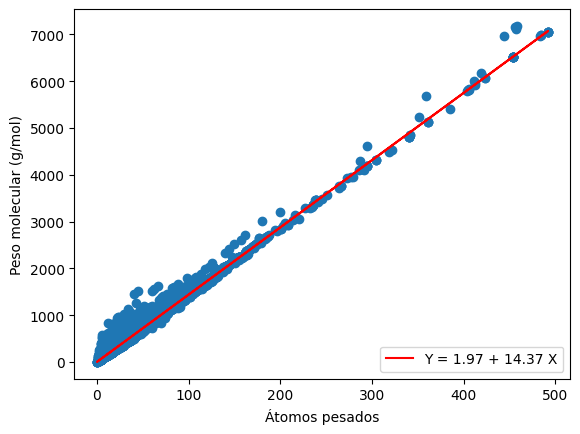

In [16]:
# Primeiro, deve ser feito o plot dos dados observados X vs Y
plt.scatter(df['heavycnt'], df['mw_g_mol'])

# Segundo, deve ser obtido o valor predito para cada registro X, a partir da equação de regressão
y_pred = lr_g_mol.predict(X_g_mol)

# Terceiro, deve ser feito o plot dos dados preditos
plt.plot(df['heavycnt'], y_pred, color='red', label=f'Y = {round(b0_g_mol,2)} + {round(b1_g_mol[0],2)} X')

plt.xlabel('Átomos pesados')
plt.ylabel('Peso molecular (g/mol)')

plt.legend(loc='lower right')
plt.show()

***